# Problem Set #1: Bernoulli bandits and Thompson sampling
## Ec 143, Spring 2026
_Bryan S. Graham_
December 2023 (last updated Jan 2026)

**Due by 5PM on February 4th.** The GSI, Jinglin Yang (jinglin.yang@berkeley.edu), will handle the logistics of problem set collection.    

Working with your classmates on the problem set is actively encouraged, but everyone needs to turn in their own Jupyter Notebook and any other accompanying materials.  You must list all study partners on your turned in problem set. If you used AI to assist you in any way, please briefly describe how you used it and which one.  

This problem set reviews the material on Bernoulli Bandits developed in lecture. Please answer each question in a markdown box and/or by writing and execiting a code-snippet as required.

#### Code citation:
<br>
Graham, Bryan S. (2023). "Bernoulli bandits and Thompson sampling: Python Jupyter Notebook," (Version 1.0) [Computer program]. Available at http://bryangraham.github.io/econometrics/ (Accessed 18 March 2024)

#### Works cited:
Russo, Daniel J., Benjamine Van Roy, Abbas Kazerouni, Ian Osbandand Zheng Wen. (2018) "A Tutorial on Thompson Sampling," _Foundations and Trends in Machine Learning_ 11 (1): 1 - 96. Available online [here](https://www.nowpublishers.com/article/Details/MAL-070).

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

The _SimulateThompsonBernoulliBandits()_ function creates a simple laboratory for exploring the exploration-exploitation trade-off faced in the bandit setting.

In [2]:
def SimulateThompsomBernoulliBandit(alpha, T, seed=19):
    
    """
    This function simulates a J-arm Bernoulli bandit for T rounds where Thompson
    sampling is used to select arms in each round. A Beta(1,1) prior is assigned to
    each arm's success probability with independence of priors across arms.
    
    
    INPUTS
    ------
    alpha      : A list with the success probability of each of the J=len(alpha) arms.
    T          : Number of rounds to simulate.
    seed       : Seed number for random number generation (for replicability).
    
    OUTPUTS
    -------
    regrets    : One dimensional array of length T with per round (realized) regret.
    machines   : T x J 2d array recording which arm is played in each round.
    E_alpha_p  : T x J 2d array recording end-of-round posterior mean of each arm's
                 success probability.
    V_alpha_p  : T x J 2d array recording end-of-round posterior variance of each arm's
                 success probability
    S          : 1d arrange of length J with number of observed successes for each arm.
    F          : 1d arrange of length J with number of observed failures for each arm  
    """
    
    J = len(alpha)                                 
        
    S = np.zeros(J, dtype=int)
    F = np.zeros(J, dtype=int)
    
    rnd = np.random.RandomState(seed)

    regrets   = np.zeros((T,)) 
    machines  = np.zeros((T,J))
    E_alpha_p = np.zeros((T,J))
    V_alpha_p = np.zeros((T,J))
    
    for t in range(T):
        alpha_t   = rnd.beta(S + 1, F + 1)         
        machine   = np.argmax(alpha_t)             
        success_t = rnd.binomial(1,alpha[machine]) 
        S[machine] += success_t                    
        F[machine] += 1 - success_t                
        
        regrets[t] = max(alpha) - alpha[machine]

        machines[t,:] = np.eye(1,J,k=machine)
        
        E_alpha_p[t,:] = (S + 1)/(S + F + 2)
        V_alpha_p[t,:] = (S + 1)*(F + 1)/(((S+F+2)**2)*(S+F+3))
    
    return [regrets, machines, E_alpha_p, V_alpha_p, S, F] 

### Question #1
Add comments to the _SimulateThompsomBernoulliBandit()_ code-block. Next Provide a one-paragraph summary of the function in this markdown box.

Question #2 (see below) will ask you to discuss the output of a simple simulation experiment. In this experiment the first arm is the optimal one with a success rate (e.g.,a "click-through-rate" of $\alpha_0 = 0.55$. Arms 2 and 3 have success rates of $\alpha_1 = 0.40$ and $\alpha_2 = 0.30$ respectively. We simulate $T=1000$ rounds.

In [3]:
alpha0 = [0.55, 0.30, 0.40]       # Population success rates for each arm
T = 1000                          # Number of rounds to simulate

[regrets, machines, E_alpha_p, V_alpha_p, S, F] = \
                SimulateThompsomBernoulliBandit(alpha0, T, seed=361)

We use the simulation output to plot the posterior mean and standard deviation of each arm's success probability as a function $T$. We also plot total regret as a function of $T$.

Text(0, 0.5, 'Total regret')

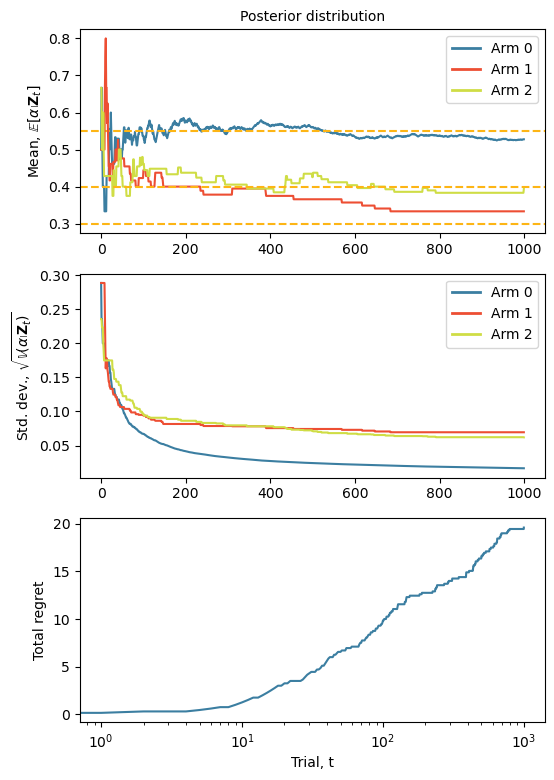

In [4]:
fig_bernoulli_bandits, sbp = plt.subplots(nrows=3, figsize=(6, 9))
ax0 = sbp[0] # Handle for top subplot
ax1 = sbp[1] # Handle for middle subplot
ax2 = sbp[2] # Handle for bottom subplot

# Select first subplot (Posterior mean)
plt.axes(ax0) 

plt.plot(E_alpha_p[:,0], color='#3B7EA1', label='Arm 0')
plt.axhline(y = alpha0[0], color = '#FDB515', linestyle = '--') 

plt.plot(E_alpha_p[:,1], color='#ED4E33', label='Arm 1')
plt.axhline(y = alpha0[1], color = '#FDB515', linestyle = '--') 

plt.plot(E_alpha_p[:,2],  color='#CFDD45', label='Arm 2')
plt.axhline(y = alpha0[2], color = '#FDB515', linestyle = '--') 

ax0.set_title(r'Posterior distribution', fontsize=10)
ax0.set_ylabel(r'Mean, $\mathbb{E}\left[\left.\alpha\right|\mathbf{Z}_{t}\right]$', size=10)

# Add custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#3B7EA1', lw=2),
                Line2D([0], [0], color='#ED4E33', lw=2),
                Line2D([0], [0], color='#CFDD45', lw=2)]


ax0.legend(custom_lines, ['Arm 0', 'Arm 1', 'Arm 2'])


# Select second subplot (Posterior variance)
plt.axes(ax1) 

plt.plot(V_alpha_p[:,0]**0.5, color='#3B7EA1', label='Arm 0')
plt.plot(V_alpha_p[:,1]**0.5, color='#ED4E33', label='Arm 1')
plt.plot(V_alpha_p[:,2]**0.5,  color='#CFDD45', label='Arm 2')

ax1.set_ylabel(r'Std. dev., $\sqrt{\mathbb{V}\left(\left.\alpha\right|\mathbf{Z}_{t}\right)}$', size=10)

# Add custom legend
ax1.legend(custom_lines, ['Arm 0', 'Arm 1', 'Arm 2'])

# Select third subplot (Regret)
plt.axes(ax2) 
plt.xscale('log')

plt.plot(np.cumsum(regrets), color='#3B7EA1')

ax2.set_xlabel(r'Trial, t')
ax2.set_ylabel(r'Total regret')


### Question #2
Describe and discuss each of the plots above in this markdown box. Your discussion should connect to the exploration-exploitation trade-off discussed in lecture as well as our presentation of the expected regret bound for Thompson sampling.

Next we plot the posterior density for each arm after $T=1000$ rounds.

Text(0, 0.5, 'Probability density function after $T$ trials')

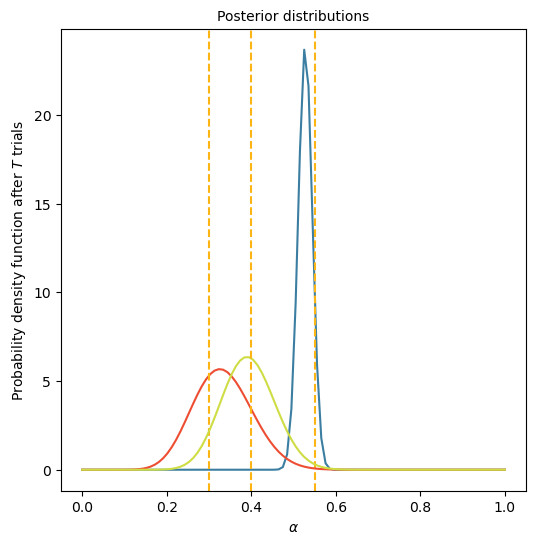

In [5]:
a = np.linspace(0, 1, num=100)

# Initiate figure object
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()

plt.plot(a, sp.stats.beta(S[0]+1, F[0]+1).pdf(a), color='#3B7EA1', label='Arm 1')
plt.axvline(x = alpha0[0], color = '#FDB515', linestyle = '--') 

plt.plot(a, sp.stats.beta(S[1]+1, F[1]+1).pdf(a), color='#ED4E33', label='Arm 2')
plt.axvline(x = alpha0[1], color = '#FDB515', linestyle = '--') 

plt.plot(a, sp.stats.beta(S[2]+1, F[2]+1).pdf(a), color='#CFDD45', label='Arm 3')
plt.axvline(x = alpha0[2], color = '#FDB515', linestyle = '--') 

ax.set_title(r'Posterior distributions', fontsize=10)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'Probability density function after $T$ trials')

### Question #3
Describe and discuss the plot above in this markdown box. Your discussion should connect to the exploration-exploitation trade-off discussed. Be sure to discuss the location and dispersion of each posterior distribution.

### Question #4
This question will require you to adapt and build-upon the codebase above. Using the film survey preference data presented in lecture as "ground truth" construct a simulation experiment evaluating the regret properties of (i) Thompson sampling as well as those of (ii) a bandit which just pulls arms uniformly at random (a pure exploration algorithm) and (iii) an algorithm which always pulls the arm with the highest posterior mean for its success probability (a "greedy" exploitation procedure).    

You should complete $S=1000$ simulations, each consisting of $T=1000$ rounds. Summarize average total regret across each of $S=1000$ simulations for each algorithm  (as well as the standard deviation of total regret). Be sure to use a different random seed number for each of the $s=1,\dots,S$ simulations.   

Present your results in a table and discuss them. How does Thompson sampling balance exploration and exploitation?